## Kaggle Machine Learning & Data Science Survey Ext

In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [2]:
# Load the data
df = pd.read_csv('kaggle_2017_to_2020.csv', low_memory = False)

In [3]:
# Print the information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80327 entries, 0 to 80326
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unique_Id                           80327 non-null  int64 
 1   Time                                80327 non-null  object
 2   Year                                80327 non-null  int64 
 3   Age                                 80327 non-null  object
 4   Gender                              80327 non-null  object
 5   Country                             80327 non-null  object
 6   Degree                              80327 non-null  object
 7   Job Title                           80327 non-null  object
 8   Company Size                        80327 non-null  object
 9   Team Size                           80327 non-null  object
 10  ML Status in Company                80327 non-null  object
 11  Compensation Status                 80327 non-null  ob

In [4]:
# Display first five rows
df.head()

,Unique_Id,Time,Year,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),Specialised HW,TPU Usage,ML Methods experience (in years)
0,0,Unknown / Not Specified,2017,25.0,Male,Argentina,Master’s degree,Machine Learning Engineer,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,"Basic laptop (Macbook),Traditional Workstation",Unknown / Not Specified,Unknown / Not Specified
1,1,Unknown / Not Specified,2017,21.0,Prefer not to say,Argentina,No formal education past high school,Business Analyst,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
2,2,Unknown / Not Specified,2017,25.0,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,"20,001-30,000",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
3,3,Unknown / Not Specified,2017,28.0,Male,Argentina,Bachelor’s degree,Other,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Other,Unknown / Not Specified,Unknown / Not Specified
4,4,Unknown / Not Specified,2017,38.0,Male,Argentina,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified


In [5]:
# Check for missing values
df.isnull().sum()

Unique_Id                             0
Time                                  0
Year                                  0
Age                                   0
Gender                                0
Country                               0
Degree                                0
Job Title                             0
Company Size                          0
Team Size                             0
ML Status in Company                  0
Compensation Status                   0
Money Spent                           0
Current role experience (in years)    0
Programming language choice           0
Recommend Programming language        0
Coding experience (in years)          0
Specialised HW                        0
TPU Usage                             0
ML Methods experience (in years)      0
dtype: int64

In [6]:
# Select the columns to drop
columns_to_drop = ['Unique_Id','Time']

In [7]:
# Drop the columns
df.drop(columns = columns_to_drop, inplace =True )

In [8]:
# Find how many entries with unknown comensation are missing
df['Compensation Status'].describe()

count                       80327
unique                         19
top       Unknown / Not Specified
freq                        20201
Name: Compensation Status, dtype: object

In [9]:
# Find unique values
df['Compensation Status'].unique()

array(['Cant Disclose', '20,001-30,000', '40,000-49,999', '> $500,000',
       '50,000-59,999', '10,001-20,000', '30,000-39,999',
       '300,000-500,000', '100,000-124,999', '200,000-249,999',
       '60,000-69,999', '80,000-89,999', '70,000-79,999',
       '125,000-149,999', '150,000-199,999', '250,000-299,999',
       '90,000-99,999', '0-10,000', 'Unknown / Not Specified'],
      dtype=object)

In [10]:
# Keep only entries with known compensations
filtered_df = df[df['Compensation Status'] != 'Unknown / Not Specified']
filtered_df = filtered_df[filtered_df['Compensation Status'] != 'Cant Disclose']

In [11]:
# print filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43860 entries, 2 to 80325
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43860 non-null  int64 
 1   Age                                 43860 non-null  object
 2   Gender                              43860 non-null  object
 3   Country                             43860 non-null  object
 4   Degree                              43860 non-null  object
 5   Job Title                           43860 non-null  object
 6   Company Size                        43860 non-null  object
 7   Team Size                           43860 non-null  object
 8   ML Status in Company                43860 non-null  object
 9   Compensation Status                 43860 non-null  object
 10  Money Spent                         43860 non-null  object
 11  Current role experience (in years)  43860 non-null  ob

### About 40,000 entries were removed

In [12]:
# Check the type of education present in the survey
filtered_df['Degree'].unique()

array(['Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Master’s degree', 'Professional degree', 'Doctoral degree',
       'Unknown / Not Specified', 'No formal education past high school',
       'I prefer not to answer'], dtype=object)

In [13]:
# Remove the unknown values from education column
filtered_df = filtered_df[filtered_df['Degree'] != 'Unknown / Not Specified']

In [14]:
# Check filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43854 entries, 2 to 80325
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43854 non-null  int64 
 1   Age                                 43854 non-null  object
 2   Gender                              43854 non-null  object
 3   Country                             43854 non-null  object
 4   Degree                              43854 non-null  object
 5   Job Title                           43854 non-null  object
 6   Company Size                        43854 non-null  object
 7   Team Size                           43854 non-null  object
 8   ML Status in Company                43854 non-null  object
 9   Compensation Status                 43854 non-null  object
 10  Money Spent                         43854 non-null  object
 11  Current role experience (in years)  43854 non-null  ob

### About 20000 entries were removed

In [15]:
# Remove the data points where ML methods experiecnce is Unknown or Not specified 
filtered_df = filtered_df[filtered_df['ML Methods experience (in years)'] != 'Unknown / Not Specified']

In [16]:
# Check filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20709 entries, 40575 to 80325
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                20709 non-null  int64 
 1   Age                                 20709 non-null  object
 2   Gender                              20709 non-null  object
 3   Country                             20709 non-null  object
 4   Degree                              20709 non-null  object
 5   Job Title                           20709 non-null  object
 6   Company Size                        20709 non-null  object
 7   Team Size                           20709 non-null  object
 8   ML Status in Company                20709 non-null  object
 9   Compensation Status                 20709 non-null  object
 10  Money Spent                         20709 non-null  object
 11  Current role experience (in years)  20709 non-null

### About 2000 entries were removed

In [17]:
# Change the age column format to remove ranges and find the average
def Parse_age(age):
    if '-' in age:
        low, high = age.replace(',', '').split('-')
    elif '>' in age:
        # Extract the numeric part after '>'
        low = age.replace(',', '').strip()
    else:
        # Handle other cases if needed
        low = high = age

    return pd.Series([low, high], index=['Low Age', 'High Age'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Age', 'High Age']] = filtered_df['Age'].apply(Parse_age)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Age'] = pd.to_numeric(filtered_df['Low Age'], errors='coerce')
filtered_df['High Age'] = pd.to_numeric(filtered_df['High Age'], errors='coerce')

In [18]:
# Calculate the average of low and high range age
filtered_df['Average Age'] = (filtered_df['Low Age'] +  filtered_df['High Age']) / 2

In [19]:
# Drop the other age related column and keep average only
filtered_df = filtered_df.drop(columns = ['Age','Low Age', 'High Age'])

In [20]:
# Parse the compensation column to split between low and high range salaries
def Parse_compensation(comp_range):
    if '-' in comp_range:
        low, high = comp_range.replace('$', '').replace(',', '').split('-')
    elif '>' in comp_range:
        # Extract the numeric part after '>'
        low = comp_range.replace('>', '').replace('$', '').replace(',', '').strip()
        high = None  # Set high range to None or you can use np.nan
    else:
        # Handle other cases if needed
        low = high = None

    return pd.Series([low, high], index=['Low Range Comp', 'High Range Comp'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Range Comp', 'High Range Comp']] = filtered_df['Compensation Status'].apply(Parse_compensation)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Range Comp'] = pd.to_numeric(filtered_df['Low Range Comp'], errors='coerce')
filtered_df['High Range Comp'] = pd.to_numeric(filtered_df['High Range Comp'], errors='coerce')

In [21]:
# Add Average compensation column
filtered_df['Average Comp'] = (filtered_df['Low Range Comp'] +  filtered_df['High Range Comp']) / 2

In [22]:
# Remove compensation status is unknown or not specified
filtered_df = filtered_df.drop(columns = 'Compensation Status')

In [23]:
# Drop the other compensation related column and keep average only
filtered_df = filtered_df.drop(columns = ['High Range Comp','Low Range Comp'])

In [24]:
# Check filtered df first 10 rows
filtered_df.head(10)

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),Specialised HW,TPU Usage,ML Methods experience (in years),Average Age,Average Comp
40575,2019,Male,Algeria,Doctoral degree,Research Scientist,Unknown / Not Specified,250-999 employees,No (we do not use ML methods),Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,C++,Unknown / Not Specified,Unknown / Not Specified,Never,< 1 years,47.0,5000.0
40576,2019,Male,Algeria,Bachelor’s degree,Software Engineer,Unknown / Not Specified,250-999 employees,"We recently started using ML methods (i.e., mo...",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Once,1-2 years,52.0,15000.5
40577,2019,Male,Algeria,Master’s degree,Other,Unknown / Not Specified,0-49 employees,No (we do not use ML methods),Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,< 1 years,37.0,5000.0
40578,2019,Female,Algeria,Professional degree,Data Engineer,Unknown / Not Specified,250-999 employees,"We recently started using ML methods (i.e., mo...",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,10-15 years,42.0,15000.5
40579,2019,Male,Algeria,Bachelor’s degree,Product/Project Manager,Unknown / Not Specified,250-999 employees,"We have well established ML methods (i.e., mod...",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Java,Unknown / Not Specified,Unknown / Not Specified,Once,1-2 years,27.0,5000.0
40581,2019,Male,Algeria,Bachelor’s degree,Software Engineer,Unknown / Not Specified,0-49 employees,We are exploring ML methods (and may one day p...,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,2-3 years,32.0,5000.0
40582,2019,Male,Algeria,Master’s degree,Business Analyst,Unknown / Not Specified,50-249 employees,No (we do not use ML methods),Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,3-4 years,42.0,15000.5
40583,2019,Male,Algeria,Bachelor’s degree,DBA/Database Engineer,Unknown / Not Specified,"1000-9,999 employees",No (we do not use ML methods),Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,< 1 years,57.0,44999.5
40584,2019,Female,Algeria,Doctoral degree,Data Scientist,Unknown / Not Specified,50-249 employees,No (we do not use ML methods),Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,1-2 years,23.0,5000.0
40586,2019,Female,Algeria,Master’s degree,Research Scientist,Unknown / Not Specified,50-249 employees,No (we do not use ML methods),Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Never,2-3 years,37.0,5000.0


### Analyze the content in columns - Current role experience (in years), Money Spent, Programming language of choice, Coding experience (in years), Specialised HW

In [25]:
# Analyze Money Spent column 
filtered_df['Money Spent'].value_counts()

Unknown / Not Specified    10675
$0 ($USD)                   3590
$1000-$9,999                1778
$100-$999                   1688
$1-$99                      1235
$10,000-$99,999             1047
$100,000 or more ($USD)      696
Name: Money Spent, dtype: int64

In [26]:
# Drop NA values for statistical analysis
filtered_df = filtered_df.dropna()

In [27]:
# PErform one-way ANOVA to determine feature importance
f_statistic, p_value = f_oneway(*(filtered_df[filtered_df['Money Spent'] == category]['Average Comp'] for category in filtered_df['Money Spent'].unique()))
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 267.17178224168873
p-value: 0.0


In [28]:
# Analyze Experiecne related column 
filtered_df['Current role experience (in years)'].value_counts()

Unknown / Not Specified    20509
Name: Current role experience (in years), dtype: int64

## Current role experience (in years) can be dropped 

In [29]:
# Drop the curent tole experience column
filtered_df.drop(columns = 'Current role experience (in years)', inplace = True)

In [30]:
# Analyze Programming language choice column
filtered_df['Programming language choice'].value_counts()

Unknown / Not Specified    20509
Name: Programming language choice, dtype: int64

## Programming language choice can be dropped 

In [31]:
# Drop Programming language choice column becasue all values are either unknown or not specified
filtered_df.drop(columns = 'Programming language choice', inplace = True)

In [32]:

filtered_df['Specialised HW'].value_counts()

Unknown / Not Specified    20509
Name: Specialised HW, dtype: int64

## Specialised HW can be dropped 

In [33]:
filtered_df.drop(columns = 'Specialised HW', inplace = True)

In [34]:
filtered_df['Company Size'].value_counts()

Unknown / Not Specified     10438
0-49 employees               3592
10,000 or more employees     1999
1000-9,999 employees         1746
50-249 employees             1509
250-999 employees            1225
Name: Company Size, dtype: int64

In [35]:
f_statistic, p_value = f_oneway(*(filtered_df[filtered_df['Company Size'] == category]['Average Comp'] for category in filtered_df['Company Size'].unique()))
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 106.90098092547296
p-value: 8.381858570369196e-112


In [36]:
f_statistic, p_value = f_oneway(*(filtered_df[filtered_df['Team Size'] == category]['Average Comp'] for category in filtered_df['Team Size'].unique()))
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 99.66928293959188
p-value: 3.84902233051195e-222


In [37]:
# Analyze how many entries have no response for bothj Money Spent and Company Size columns 
count_unknown = filtered_df[(filtered_df['Money Spent'] == 'Unknown / Not Specified') & 
                            (filtered_df['Company Size'] == 'Unknown / Not Specified')].shape[0]


In [38]:
# Display the number
count_unknown

10438

In [39]:
# Remove the data points where company size and Money Spent are not specified
filtered_df = filtered_df[~((filtered_df['Money Spent'] == 'Unknown / Not Specified') & 
                            (filtered_df['Company Size'] == 'Unknown / Not Specified'))]

In [40]:
# Analyze the current state of the data set
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10071 entries, 60291 to 80325
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              10071 non-null  int64  
 1   Gender                            10071 non-null  object 
 2   Country                           10071 non-null  object 
 3   Degree                            10071 non-null  object 
 4   Job Title                         10071 non-null  object 
 5   Company Size                      10071 non-null  object 
 6   Team Size                         10071 non-null  object 
 7   ML Status in Company              10071 non-null  object 
 8   Money Spent                       10071 non-null  object 
 9   Recommend Programming language    10071 non-null  object 
 10  Coding experience (in years)      10071 non-null  object 
 11  TPU Usage                         10071 non-null  object 
 12  

In [41]:
# Display first 10 rows 
filtered_df.head(10)

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Recommend Programming language,Coding experience (in years),TPU Usage,ML Methods experience (in years),Average Age,Average Comp
60291,2020,Male,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),$0 ($USD),R,10-20 years,Never,I do not use machine learning methods,37.0,15000.5
60293,2020,Female,Argentina,Bachelor’s degree,Data Scientist,0-49 employees,1-2,"We have well established ML methods (i.e., mod...","$10,000-$99,999",Python,10-20 years,Never,5-10 years,37.0,84999.5
60294,2020,Female,Argentina,Bachelor’s degree,Software Engineer,250-999 employees,0,I do not know,$0 ($USD),Python,20+ years,Never,I do not use machine learning methods,42.0,15000.5
60296,2020,Female,Argentina,Master’s degree,Business Analyst,50-249 employees,0,No (we do not use ML methods),$100-$999,Python,< 1 years,Never,Under 1 year,37.0,5000.0
60300,2020,Male,Argentina,Some college/university study without earning ...,Software Engineer,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$0 ($USD),Python,20+ years,Once,Under 1 year,42.0,15000.5
60301,2020,Male,Argentina,Master’s degree,Machine Learning Engineer,"1000-9,999 employees",20+,"We recently started using ML methods (i.e., mo...","$10,000-$99,999",Python,10-20 years,6-25 times,4-5 years,27.0,15000.5
60306,2020,Male,Argentina,Master’s degree,Data Analyst,0-49 employees,1-2,We use ML methods for generating insights (but...,$100-$999,Python,3-5 years,2-5 times,1-2 years,42.0,44999.5
60307,2020,Male,Argentina,Doctoral degree,Data Analyst,0-49 employees,1-2,No (we do not use ML methods),$100-$999,Python,10-20 years,Once,4-5 years,52.0,5000.0
60308,2020,Male,Argentina,Doctoral degree,Machine Learning Engineer,50-249 employees,1-2,"We recently started using ML methods (i.e., mo...","$1000-$9,999",Python,10-20 years,Never,5-10 years,32.0,25000.5
60310,2020,Male,Argentina,Bachelor’s degree,Software Engineer,0-49 employees,1-2,We are exploring ML methods (and may one day p...,$1-$99,Python,10-20 years,Never,2-3 years,52.0,15000.5


### Features Analysis

In [42]:
# Perform ANOVA analysis for the features to define F-stats and p-values with repsect to Average Comp
anova_results = {}
for col in filtered_df.columns[:-1]:  # Exclude the target variable
    unique_values = filtered_df[col].unique()
    if len(unique_values) > 1:  # Check if there's more than one unique value
        f_statistic, p_value = f_oneway(*(filtered_df[filtered_df[col] == val]['Average Comp'] for val in unique_values))
        anova_results[col] = {'F-statistic': f_statistic, 'p-value': p_value}

# Print ANOVA results
for col, result in anova_results.items():
    print(f"ANOVA results for '{col}':")
    print(result)
    print()

ANOVA results for 'Gender':
{'F-statistic': 19.70586292667742, 'p-value': 3.5774788318542406e-16}

ANOVA results for 'Country':
{'F-statistic': 125.8222098769832, 'p-value': 0.0}

ANOVA results for 'Degree':
{'F-statistic': 47.33425275677518, 'p-value': 1.475351803893929e-57}

ANOVA results for 'Job Title':
{'F-statistic': 25.056818626338927, 'p-value': 1.7371683751522705e-47}

ANOVA results for 'Company Size':
{'F-statistic': 115.94067341139633, 'p-value': 7.831337754337625e-97}

ANOVA results for 'Team Size':
{'F-statistic': 114.38949529635842, 'p-value': 3.478386569141382e-140}

ANOVA results for 'ML Status in Company':
{'F-statistic': 161.322279584804, 'p-value': 1.7683202565804157e-165}

ANOVA results for 'Money Spent':
{'F-statistic': 287.02682446822934, 'p-value': 0.0}

ANOVA results for 'Recommend Programming language':
{'F-statistic': 6.082041911722793, 'p-value': 9.731952456048757e-11}

ANOVA results for 'Coding experience (in years)':
{'F-statistic': 308.09577849571974, 'p-v

### One Hot Encoding for Modeling

In [43]:
# Create a list of categorical columns and crreate binary variables from them
categorical_columns = filtered_df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(filtered_df, columns=categorical_columns)


In [44]:
# Display first five rows
df_encoded.head()

,Year,Average Age,Average Comp,Gender_Female,Gender_Male,Gender_Nonbinary,Gender_Prefer not to say,Gender_Prefer to self-describe,Country_Argentina,Country_Australia,...,TPU Usage_Once,ML Methods experience (in years)_1-2 years,ML Methods experience (in years)_10-20 years,ML Methods experience (in years)_2-3 years,ML Methods experience (in years)_20 or more years,ML Methods experience (in years)_3-4 years,ML Methods experience (in years)_4-5 years,ML Methods experience (in years)_5-10 years,ML Methods experience (in years)_I do not use machine learning methods,ML Methods experience (in years)_Under 1 year
60291,2020,37.0,15000.5,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
60293,2020,37.0,84999.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
60294,2020,42.0,15000.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
60296,2020,37.0,5000.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
60300,2020,42.0,15000.5,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [45]:
# Drop NaN values for modeling
df_encoded.dropna(inplace = True)

In [46]:
# Assign Average compensation as the target variable
target  = df_encoded['Average Comp']

In [47]:
# Assign the rest of features
features = df_encoded.drop(columns = 'Average Comp')

In [48]:
# Split the data to train and test set (30% test set)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

### Model Linear Regression

In [49]:
# Create an insatance of Linear Regression Model
ols = LinearRegression()

In [50]:
# Train the model 
model = ols.fit(features_train,target_train)

In [51]:
# Precit the values using test set features
target_predict = model.predict(features_test)

In [52]:
# Calculate R2
r2 = r2_score(target_test, target_predict)
print("R-squared value of the Linear Regression model without tuning is - ", r2)

R-squared value of the Linear Regression model without tuning is -  0.5015374988915744


### Baseline model

In [53]:
# Create a dummy regressor model
dummy_r = DummyRegressor(strategy = 'mean')

In [54]:
# Train a baseline model on the training set
dummy_r.fit(features_train, target_train)

DummyRegressor()

In [55]:
# Calculate the score of the baseline model
dummy_r.score(features_test, target_test)

-0.0007688320356509237

### Random Forest

In [56]:
# Create a simple Rnadom Forest mode and calculate R2 value
rfm = RandomForestRegressor()
model_rf = rfm.fit(features_train, target_train)
target_predict_rf = model_rf.predict(features_test)
r2_rf =r2_score(target_test,target_predict_rf )
print("R-squared value of the RandomForest model is - ", r2_rf)

R-squared value of the RandomForest model is -  0.46831448336710346


### Grid Search CV for Random Forest Model

In [64]:
# Determine the parameters for fine tuning
search_grid = {
    'n_estimators': [10,    300, 500],
    'max_depth': [None, 10,  40],
    'min_samples_split': [2,  20],
    'min_samples_leaf': [1, 2, 4,5 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 30],
    'min_impurity_decrease': [0.0, 0.2]
}

In [65]:
# Create and instance of Random Forest model
rfm = RandomForestRegressor(random_state = 42)

In [66]:
# Apply a grid search cross validation with the set of parameters and cross validation of 5 
grid_search = GridSearchCV(estimator = rfm, param_grid = search_grid, cv =5, n_jobs = -1, scoring = 'r2', verbose = 10)

In [67]:
grid_search.fit(features_train, target_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 30],
                         'min_impurity_decrease': [0.0, 0.2],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 20],
                         'n_estimators': [10, 300, 500]},
             scoring='r2', verbose=10)

In [68]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=500, random_state=42)

In [69]:
best_grid_model_rf = grid_search.best_estimator_

In [70]:
target_predict_rfm = best_grid_model_rf.predict(features_test)

In [71]:
# Calculate R2 of the model
r2_best_rfm = r2_score(target_test, target_predict_rfm)
print("R-squared value of the RandomForest model with a grid search cross validation is - ", r2_best_rfm)

R-squared value of the RandomForest model with a grid search cross validation is -  0.48223959307287834


### Features importance visualization for reccomendations

In [80]:



# Train Random Forest model with settings selected by GridSearch CV
random_forest = RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=500, random_state=42)
random_forest.fit(features_train, target_train)





RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=500, random_state=42)

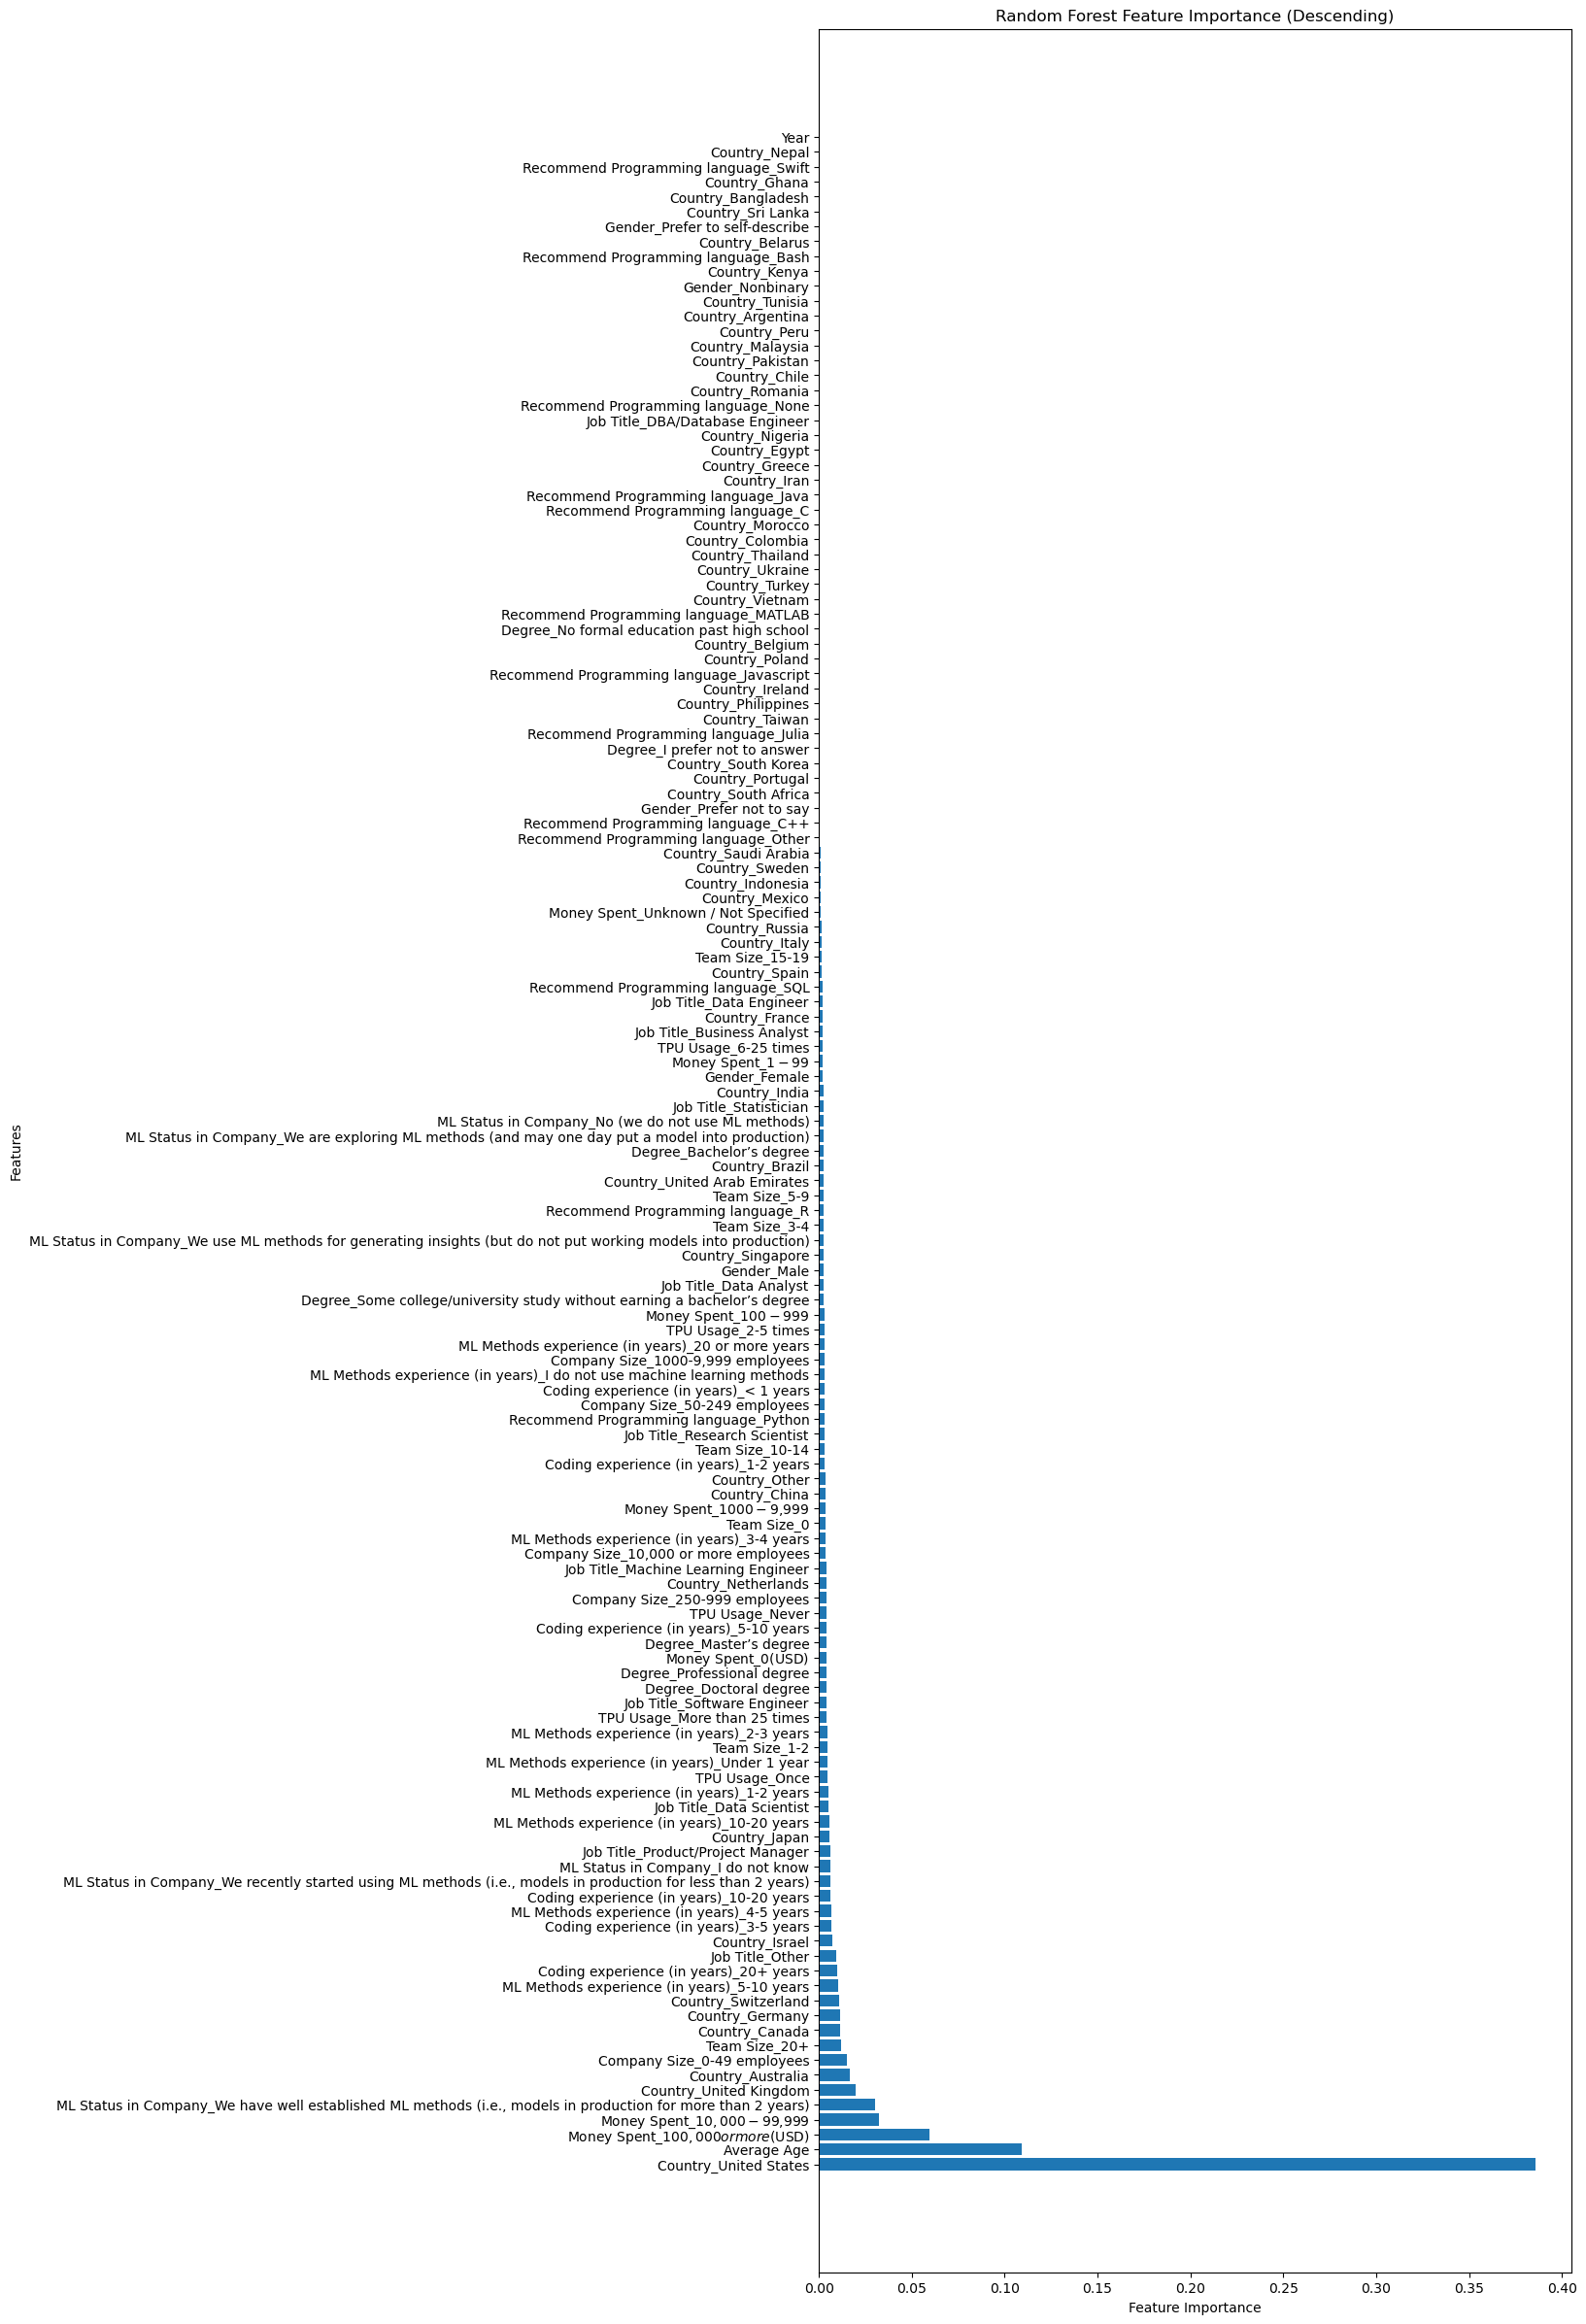

In [81]:
# Step 2: Feature Importance
feature_importance = random_forest.feature_importances_

# Sort feature importance and feature names
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = np.array(features_train.columns)[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 30))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance (Descending)')
plt.show()

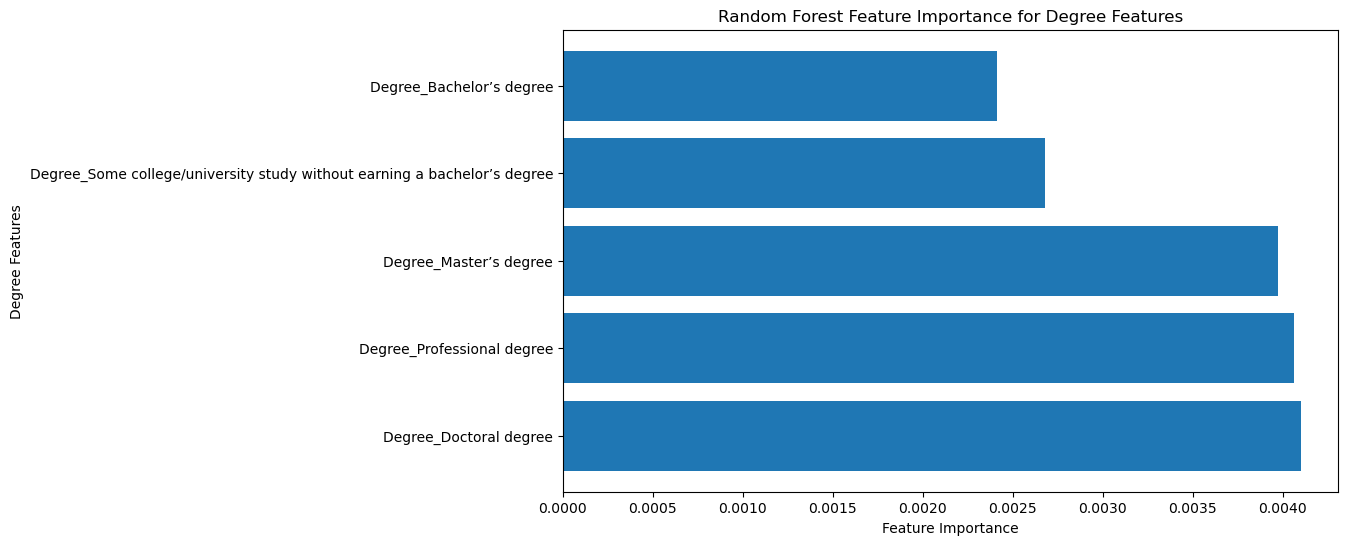

In [82]:
# Filter degree features
degree_features = [feature for feature in sorted_features if 'degree' in feature]

# Get corresponding indices and importance values
degree_indices = [list(sorted_features).index(feature) for feature in degree_features]
degree_importance = sorted_importance[degree_indices]

# Plot feature importance for degree features
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(degree_features, degree_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Degree Features')
plt.title('Random Forest Feature Importance for Degree Features')
plt.show()

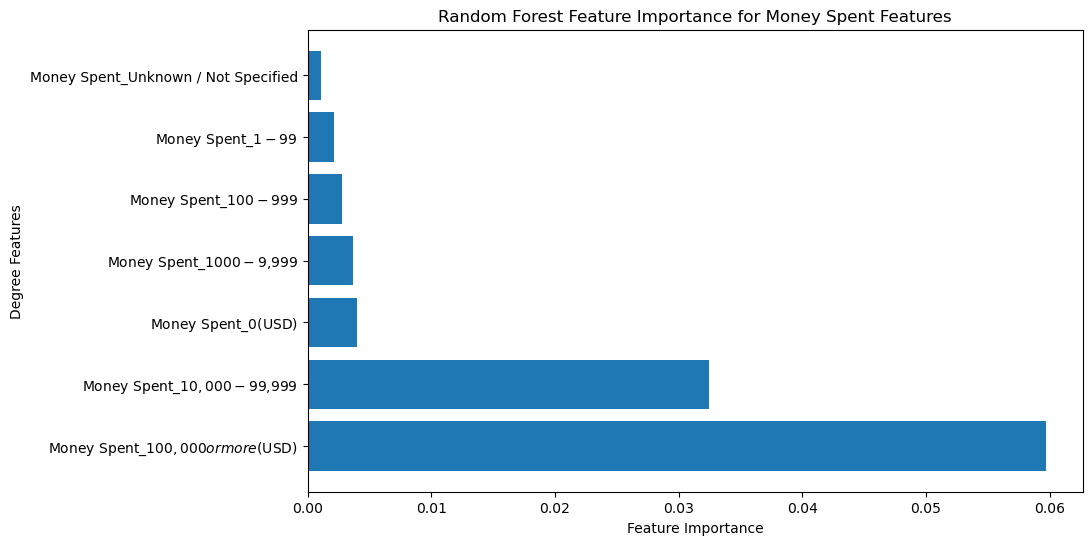

In [84]:
# Filter degree features
degree_features = [feature for feature in sorted_features if 'Money' in feature]

# Get corresponding indices and importance values
degree_indices = [list(sorted_features).index(feature) for feature in degree_features]
degree_importance = sorted_importance[degree_indices]

# Plot feature importance for degree features
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(degree_features, degree_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Degree Features')
plt.title('Random Forest Feature Importance for Money Spent Features')
plt.show()

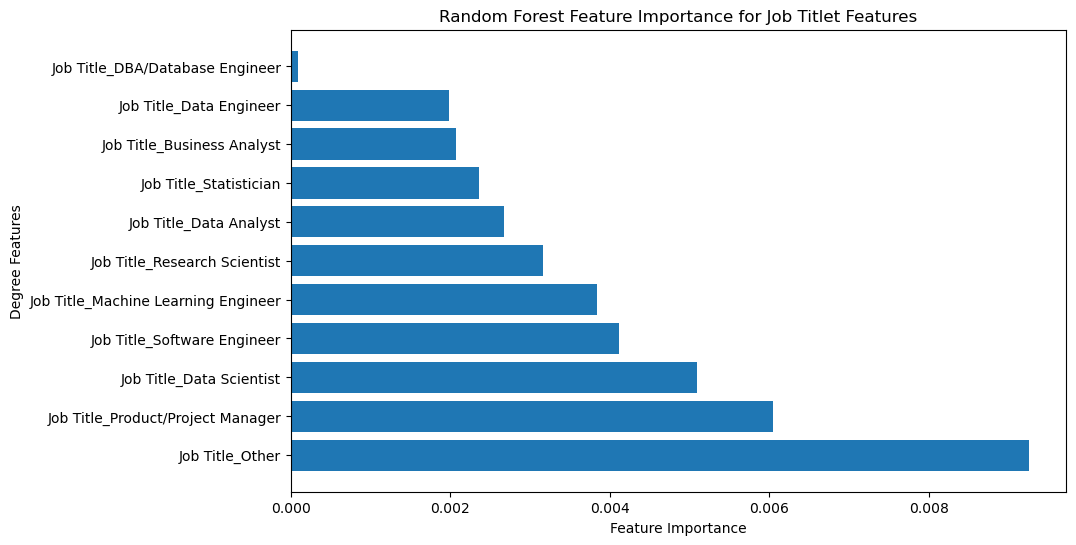

In [86]:
# Filter degree features
degree_features = [feature for feature in sorted_features if 'Job' in feature]

# Get corresponding indices and importance values
degree_indices = [list(sorted_features).index(feature) for feature in degree_features]
degree_importance = sorted_importance[degree_indices]

# Plot feature importance for degree features
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(degree_features, degree_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Degree Features')
plt.title('Random Forest Feature Importance for Job Titlet Features')
plt.show()